### **Visualize the gis data on the high-mountain asia region.**

In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
import matplotlib.pyplot as plt
import geopandas as gpd



In [2]:

root = '/Users/luo/Library/CloudStorage/OneDrive-Personal/GitHub/High-Moutain-Asia-GIS-Data' ### your repo directory



## 1. HMA extent
#### 1.1 HMA extent from existing studies; 


In [6]:
path_hma_brun2017 = root + '/extents/HMA/hma_regions_brun2017.gpkg'
path_hma_dshean2020 = root + '/extents/HMA/hma_regions_dshean2020.gpkg'



In [7]:
hma_dshean2020 = gpd.read_file(path_hma_dshean2020)
hma_dshean2020.head()


,himap_region,geometry
0,Eastern Hindu Kush,"MULTIPOLYGON (((73.45169 36.98397, 73.44597 36..."
1,Western Himalaya,"MULTIPOLYGON (((75.78745 35.31560, 75.78746 35..."
2,Eastern Himalaya,"MULTIPOLYGON (((95.22303 29.82187, 95.21352 29..."
3,Central Himalaya,"MULTIPOLYGON (((80.93560 30.70763, 80.98096 30..."
4,Karakoram,"MULTIPOLYGON (((75.87363 37.31180, 75.89061 37..."


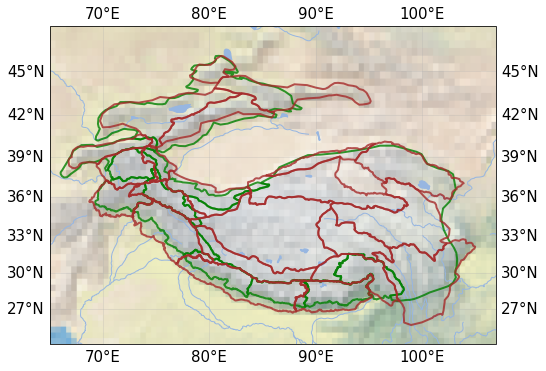

In [5]:
plt.rcParams.update({'font.size':15})
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1,projection=ccrs.Mercator())
ax.set_extent([65.0, 107.0, 24.0, 46.0])
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5, zorder=1)
fea_hma_brun2017 = cfeature.ShapelyFeature(Reader(path_hma_brun2017).geometries(),\
                            crs=ccrs.PlateCarree(), edgecolor='Green',alpha=0.8,\
                            linestyle='-', linewidth=2, facecolor='none')
fea_hma_dshean2020 = cfeature.ShapelyFeature(Reader(path_hma_dshean2020).geometries(),\
                            crs=ccrs.PlateCarree(), edgecolor='Brown', alpha=0.8,\
                            linestyle='-', linewidth=2, facecolor='none')

ax.add_feature(fea_hma_brun2017, zorder=2)
ax.add_feature(fea_hma_dshean2020, zorder=2)
ax.stock_img()
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.RIVERS)



#### 1.2. Tibet Plateau region from Chinese TPDC.

In [1]:
### TP boundary from Chinese TPDC
path_tb_2500 = root + '/extent/TPlateau_boundary/TPBoundary_2500.gpkg'
path_tb_3000 = root + '/extent/TPlateau_boundary/TPBoundary_3000.gpkg'
path_tb_hf = root + '/extent/TPlateau_boundary/TPBoundary_HF.gpkg'
path_tb_new2021 = root + '/extent/TPlateau_boundary/TPBoundary_new2021.gpkg'


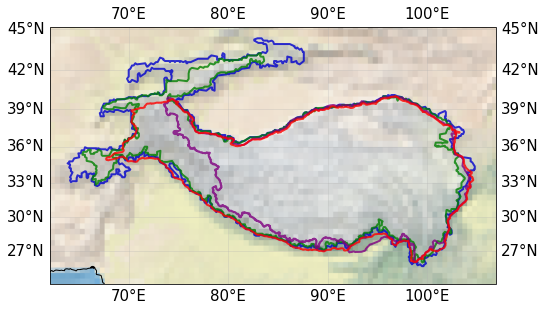

In [18]:
warnings.filterwarnings('ignore')
plt.rcParams.update({'font.size':15})

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1,projection=ccrs.Mercator())

ax.set_extent([62.0, 107.0, 24.0, 43.0])
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5, zorder=1)
fea_tp_2500 = cfeature.ShapelyFeature(Reader(path_tb_2500).geometries(),\
                            crs=ccrs.PlateCarree(), edgecolor='MediumBlue',alpha=0.8,\
                            linestyle='-', linewidth=2, facecolor='none')
fea_tp_3000 = cfeature.ShapelyFeature(Reader(path_tb_3000).geometries(),\
                            crs=ccrs.PlateCarree(), edgecolor='Green', alpha=0.8,\
                            linestyle='-', linewidth=2, facecolor='none')
fea_tp_hf = cfeature.ShapelyFeature(Reader(path_tb_hf).geometries(),\
                            crs=ccrs.PlateCarree(), edgecolor='Purple', alpha=0.8,\
                            linestyle='-', linewidth=2, facecolor='none')
fea_tp_new2021 = cfeature.ShapelyFeature(Reader(path_tb_new2021).geometries(),\
                            crs=ccrs.PlateCarree(), edgecolor='Red', alpha=0.8,\
                            linestyle='-', linewidth=2, facecolor='none')

ax.add_feature(fea_tp_2500, zorder=2)
ax.add_feature(fea_tp_3000, zorder=2)
ax.add_feature(fea_tp_hf, zorder=2)
ax.add_feature(fea_tp_new2021, zorder=2)
ax.stock_img(); ax.coastlines()



## 2. Main basins 

In [5]:
path_basins_asia = root + '/basins/asia_basins_6min.gpkg' 
path_basins_tp = root + '/basins/asia_basins_6min_TPBoundNew2021.gpkg'    ## clipping by qgis.



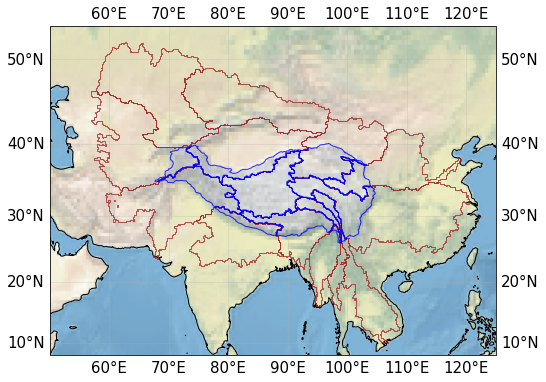

In [19]:
warnings.filterwarnings('ignore')
plt.rcParams.update({'font.size':15})

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1,projection=ccrs.Mercator())

ax.set_extent([50.0, 125.0, 8.0, 47.0])
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5, zorder=1)
fea_basins_asia = cfeature.ShapelyFeature(Reader(path_basins_asia).geometries(),\
                            crs=ccrs.PlateCarree(), edgecolor='Brown', alpha=0.8,\
                            linestyle='-', linewidth=1, facecolor='none')
fea_basins_tp = cfeature.ShapelyFeature(Reader(path_basins_tp).geometries(),\
                            crs=ccrs.PlateCarree(), edgecolor='Blue', alpha=0.8,\
                            linestyle='-', linewidth=1, facecolor='none')

ax.add_feature(fea_basins_asia, zorder=2)
ax.add_feature(fea_basins_tp, zorder=2)
ax.stock_img(); ax.coastlines()


## 3. Glaciers

In [22]:
path_rgi60_13 = root + '/glaciers/rgi60_13.gpkg' 
path_rgi60_14 = root + '/glaciers/rgi60_14.gpkg'     
path_rgi60_15 = root + '/glaciers/rgi60_15.gpkg'    


In [28]:
## check data
rgi60_13 = gpd.read_file(path_rgi60_13)
print(rgi60_13.shape); print(rgi60_13.head(2))


(54429, 23)
            RGIId         GLIMSId   BgnDate   EndDate   CenLon   CenLat  \
0  RGI60-13.00001  G079494E34471N  20000810  -9999999  79.4939  34.4713   
1  RGI60-13.00002  G077951E35545N  20020802  -9999999  77.9513  35.5452   

  O1Region O2Region   Area  Zmin  ...  Aspect  Lmax  Status  Connect  Form  \
0       13        5  0.432  5678  ...     312   683       0        0     0   
1       13        5  0.367  5889  ...     195  1307       0        0     0   

   TermType  Surging  Linkages  Name  \
0         0        9         9  None   
1         0        9         9  None   

                                            geometry  
0  MULTIPOLYGON (((79.49945 34.47555, 79.49880 34...  
1  MULTIPOLYGON (((77.95519 35.55007, 77.95517 35...  

[2 rows x 23 columns]


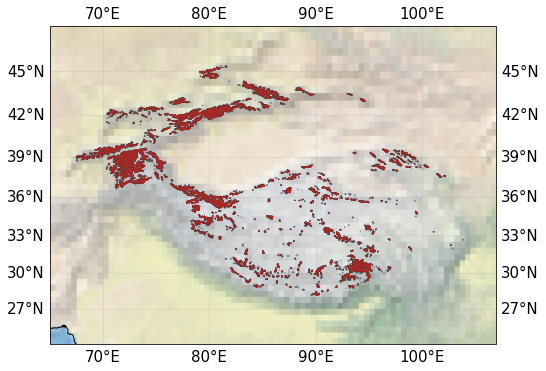

In [34]:
warnings.filterwarnings('ignore')
plt.rcParams.update({'font.size':15})

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1,projection=ccrs.Mercator())

ax.set_extent([65.0, 107.0, 24.0, 46.0])
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5, zorder=1)
fea_rgi60_13 = cfeature.ShapelyFeature(Reader(path_rgi60_13).geometries(),\
                            crs=ccrs.PlateCarree(), edgecolor='Blue', alpha=0.8,\
                            linestyle='-', linewidth=1, facecolor='none')    
fea_rgi60_14 = cfeature.ShapelyFeature(Reader(path_rgi60_13).geometries(),\
                            crs=ccrs.PlateCarree(), edgecolor='Green', alpha=0.8,\
                            linestyle='-', linewidth=1, facecolor='none') 
fea_rgi60_15 = cfeature.ShapelyFeature(Reader(path_rgi60_13).geometries(),\
                            crs=ccrs.PlateCarree(), edgecolor='Brown', alpha=0.8,\
                            linestyle='-', linewidth=1, facecolor='none')

# ax.add_feature(fea_rgi60_13, zorder=2)   ### !!!very time consuming
# ax.add_feature(fea_rgi60_14, zorder=2)   ### !!!very time consuming
ax.add_feature(fea_rgi60_15, zorder=2)
ax.stock_img(); ax.coastlines()

